# Import relevant library

In [1]:
!!pip install tweepy
!!pip install wordcloud

['Collecting wordcloud',
 '  Downloading wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)',
 'Requirement already satisfied: pillow in c:\\users\\selor\\anaconda3\\lib\\site-packages (from wordcloud) (8.0.1)',
 'Requirement already satisfied: numpy>=1.6.1 in c:\\users\\selor\\anaconda3\\lib\\site-packages (from wordcloud) (1.19.2)',
 'Requirement already satisfied: matplotlib in c:\\users\\selor\\anaconda3\\lib\\site-packages (from wordcloud) (3.3.2)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in c:\\users\\selor\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (2.4.7)',
 'Requirement already satisfied: cycler>=0.10 in c:\\users\\selor\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (0.10.0)',
 'Requirement already satisfied: python-dateutil>=2.1 in c:\\users\\selor\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (2.8.1)',
 'Requirement already satisfied: certifi>=2020.06.20 in c:\\users\\selor\\anaconda3\\lib\\site-pac

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# Twitter data cleaning

## Load tweeter file data from the previous chapter

In [3]:
data=pd.read_csv('brexit.csv')
data['tweet_text']=data['text']

## clean http links 

In [4]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
data['text'][0]

"JOHN BERCOW\n\n'I voted for Khan'\n'far and best candidate'\n'deserved a second term'\n\nThe dwarfs hatred for the Conser… https://t.co/TLI18FP2ey"

In [5]:
remove_url(data['text'][0])

'JOHN BERCOWI voted for Khanfar and best candidatedeserved a second termThe dwarfs hatred for the Conser'

In [6]:
data['text']=[remove_url(i) for i in data['text']]

In [7]:
data['text'][:3]

0    JOHN BERCOWI voted for Khanfar and best candid...
1    montie StephenLloydEBN How is winning more sea...
2    heraldscotland 7 years ago maybe Brexit Englan...
Name: text, dtype: object

In [8]:
lower_case = [word.lower() for word in data['text'][0].split()]

In [9]:
lower_case

['john',
 'bercowi',
 'voted',
 'for',
 'khanfar',
 'and',
 'best',
 'candidatedeserved',
 'a',
 'second',
 'termthe',
 'dwarfs',
 'hatred',
 'for',
 'the',
 'conser']

# Twitter word frequency analysis

In [10]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in data['text']]
#words_in_tweet[:2]

In [11]:
'''To get the count of how many times each word appears in the sample, 
you can use the built-in Python library collections'''

all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls

['john',
 'bercowi',
 'voted',
 'for',
 'khanfar',
 'and',
 'best',
 'candidatedeserved',
 'a',
 'second',
 'termthe',
 'dwarfs',
 'hatred',
 'for',
 'the',
 'conser',
 'montie',
 'stephenlloydebn',
 'how',
 'is',
 'winning',
 'more',
 'seats',
 'amp',
 'another',
 'council',
 'brokenthe',
 'lds',
 'have',
 'hit',
 'bottom',
 'amp',
 'youll',
 'se',
 'heraldscotland',
 '7',
 'years',
 'ago',
 'maybe',
 'brexit',
 'england',
 'and',
 'scotland',
 'have',
 'a',
 'very',
 'different',
 'set',
 'of',
 'values',
 'hence',
 'the',
 'tension',
 'jamesnathan333',
 'parlezmentory',
 'mobrexit',
 'stillbattsby',
 'theyll',
 'soon',
 'get',
 'clued',
 'up',
 'when',
 'they',
 'cant',
 'vote',
 'without',
 'photo',
 'id',
 'tory',
 'line',
 'going',
 'into',
 'future',
 'ge',
 'will',
 'be',
 'something',
 'like',
 'stronger',
 'together',
 'they',
 'will',
 'claim',
 'they',
 'deliverfrom',
 'brexit',
 'horwitzpolitics',
 'tel',
 'avivjaffa',
 'is',
 'an',
 'amazing',
 'area',
 'lots',
 'of',
 'c

In [12]:
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)

[('the', 359),
 ('brexit', 297),
 ('to', 193),
 ('a', 167),
 ('and', 139),
 ('of', 138),
 ('in', 99),
 ('is', 97),
 ('for', 92),
 ('on', 76),
 ('it', 75),
 ('that', 73),
 ('you', 70),
 ('i', 63),
 ('this', 60)]

In [13]:
#You can put the data summary in a pandas dataFrame and save it in the format that best suits you
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,359
1,brexit,297
2,to,193
3,a,167
4,and,139


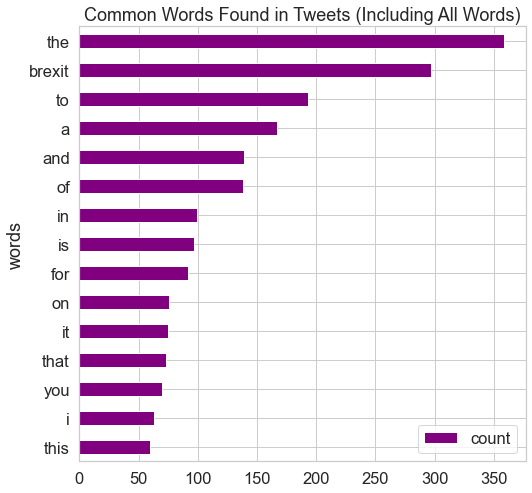

In [14]:
#plot data 
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

## Remove stop word 

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
#set stopwords depending on the language used in your data
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10] 

["mightn't",
 'as',
 'any',
 'has',
 'up',
 "it's",
 'she',
 'just',
 'himself',
 'than']

In [17]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

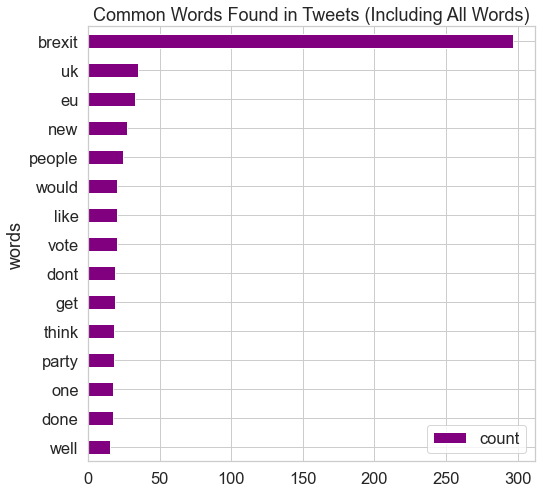

In [18]:
all_words_no_urls = list(itertools.chain(*tweets_nsw))
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()
#plot data 
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [19]:
#Now we remove collection words (words that apear in our initial tweet research)

# Tweeter Bigramm aanalysis

Explore Co-occurring Words (Bigrams)
To identify co-occurrence of words in the tweets, you can use bigrams from nltk.

In [20]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('new', 'york'), 12),
 (('boris', 'johnson'), 8),
 (('brexit', 'done'), 7),
 (('voted', 'brexit'), 7),
 (('brexit', 'party'), 7),
 (('queens', 'speech'), 7),
 (('brexit', 'uk'), 6),
 (('brexit', 'deal'), 6),
 (('brexit', 'referendum'), 5),
 (('brexit', 'means'), 5),
 (('york', 'remains'), 5),
 (('winner', 'brexit'), 5),
 (('subsidy', 'control'), 5),
 (('brexit', 'would'), 4),
 (('brexit', 'britain'), 4),
 (('didnt', 'vote'), 4),
 (('social', 'care'), 4),
 (('york', 'wins'), 4),
 (('davouts', 'hackneyabbott'), 4),
 (('im', 'sure'), 4)]

In [21]:
#Put the result in a pandas dataframe
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(new, york)",12
1,"(boris, johnson)",8
2,"(brexit, done)",7
3,"(voted, brexit)",7
4,"(brexit, party)",7
5,"(queens, speech)",7
6,"(brexit, uk)",6
7,"(brexit, deal)",6
8,"(brexit, referendum)",5
9,"(brexit, means)",5


# Plot the bigramm in a network diagram

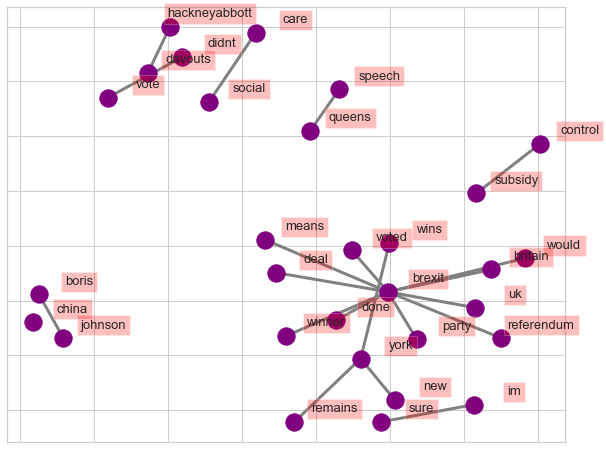

In [22]:
import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

There are 49479 words in the combination of all review.


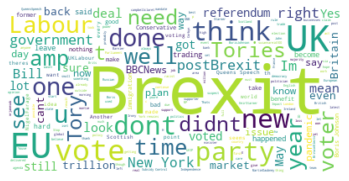

In [23]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#clean_tweets_no_urls

text = " ".join(review for review in data['text'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["covid","vaccin", "will", "go", "people", "peopl"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()